### 1. Create class directory in test directory
### 2. Move images from train to test directory


In [1]:
import glob
import shutil
import os
import matplotlib.pyplot as plt
import seaborn as sns

src_dir = "data/train/"
dst_dir = "data/test/"
classes = []

#### Reading the classes in train directory

In [2]:

for filename in os.listdir(src_dir):
    classes.append(filename)

In [3]:

numbers = []
for cls in classes:
    src = src_dir + cls
    c = 0
    for filename in os.listdir(src):
        c += 1
    print("Number of images in", cls, "=", c)
    numbers.append(c)
    

Number of images in human_ear = 58
Number of images in human_eye = 163
Number of images in human_feet = 170
Number of images in human_finger = 171
Number of images in human_mouth = 148


In [4]:
img_classes = {}

for c, n in zip(classes, numbers):
    img_classes[c] = n

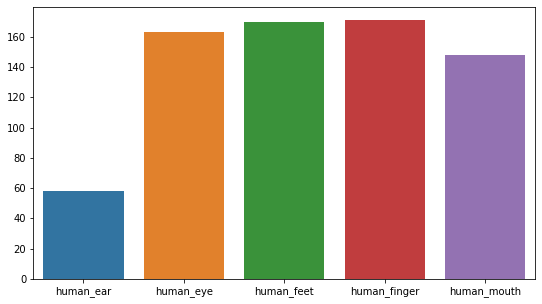

In [5]:

plt.figure(figsize=(9,5))
sns.barplot(x=list(img_classes.keys()), y=list(img_classes.values()))


In [6]:
img_classes

{'human_ear': 58,
 'human_eye': 163,
 'human_feet': 170,
 'human_finger': 171,
 'human_mouth': 148}

### Test images number with 75/25 split

In [7]:

test_no = []
for k, v in img_classes.items():
    g = round(v*100/sum(img_classes.values()), 2)
    n = round(v*0.25)
    print("Train:",k, g, "%, Test:(25%)", n, "images")
    test_no.append(n)

Train: human_ear 8.17 %, Test:(25%) 14 images
Train: human_eye 22.96 %, Test:(25%) 41 images
Train: human_feet 23.94 %, Test:(25%) 42 images
Train: human_finger 24.08 %, Test:(25%) 43 images
Train: human_mouth 20.85 %, Test:(25%) 37 images


### Create class folders in test

In [8]:
for c in classes:
    os.mkdir(dst_dir + c)

In [9]:
test_classes = {}

for k, v in zip(classes, test_no):
    test_classes[k] = v

test_classes

{'human_ear': 14,
 'human_eye': 41,
 'human_feet': 42,
 'human_finger': 43,
 'human_mouth': 37}

In [10]:
count = 0
print('Moving from 25% images from train to test...')
for cls, val in test_classes.items():
    for count, jpgfile in enumerate(glob.iglob(os.path.join(src_dir+cls, "*.jpg"))):
        if count >= val:
            break
#         shutil.copy(jpgfile, dst_dir+cls)
#         os.remove(jpgfile)
        
    print(count, cls)
print('Move Complete.')

Moving from 25% images from train to test...
14 human_ear
41 human_eye
42 human_feet
43 human_finger
37 human_mouth
Move Complete.
